In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)

In [28]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [4]:
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
duomenu_reiksmes = ['gender', 'smoking_status' , 'work_type', 'ever_married' ,'residence_type', ]

for duomenys in duomenu_reiksmes:
    df[duomenys] = df[duomenys].str.lower()
    
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
import pandas as pd
import mysql.connector 

mydb = mysql.connector.connect(
    host="localhost", # IP address
    port="3317",
    user="root",
    password="Lexyic4917",
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('select bmi, count(bmi) as skaicius from stroke_data where bmi = "N/A"', con=mydb)
df

C:\Users\Tavatevs\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bmi,skaicius
0,N/A,201


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
bmi_reiksme=df['bmi'].mean()
df['bmi'].replace(np.nan, bmi_reiksme, inplace=True) ## duomenys, kurie buvo null pakeisti stulpelio vidurkiu, kad neliktu tusciu vietu

In [11]:
df.duplicated().sum()

0

In [ ]:
Hipotezės :

    1.Vyrai patiria daugiau insultų nei moterys;​
    2.Vyresnis amžius turi tiesioginės įtakos insultui;​
    3.Žmonės, turintys hipertenzija, yra labiau linkę į insultą;​
    4.Vedę žmonės dažniau patiria insultą nei nesusituokę;​
    5.Rūkantys žmonės dažniau patiria insultą.​
    6.Privačiame sektoriuje dirbantys bei mieste gyvenantys žmonės turi didesnę insulto tikimybę.

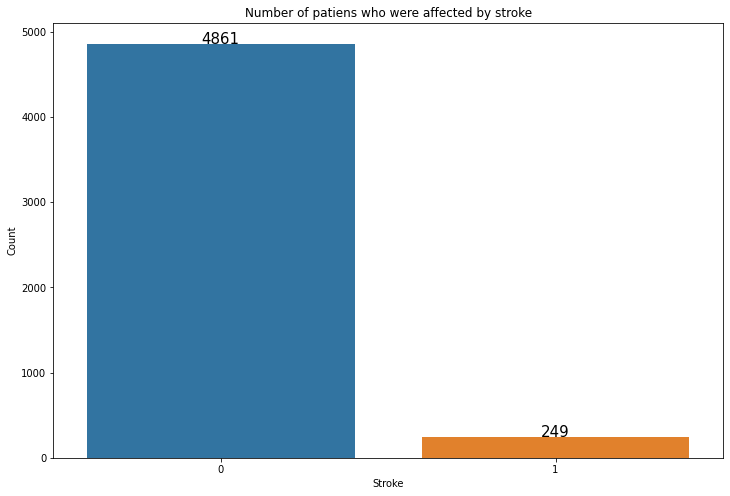

In [12]:
## 1. Vyrai patiria daugiau insultų nei moterys;​

plt.figure(figsize=(12,8))
ax = sns.countplot(x=df['stroke'], data=df)
plt.title('Number of patiens who were affected by stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)
    

Text(0.5, 1.0, 'Gender distribution')

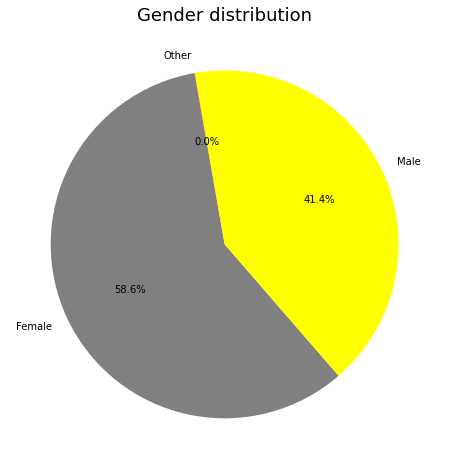

In [29]:
sns.color_palette("hls", 10)
type_counts = df.gender.value_counts()
pie, ax = plt.subplots(figsize=[12,8])
plt.pie(type_counts, labels = type_counts.index,startangle=100,autopct="%1.1f%%", colors = ['Grey','Yellow', 'Red'])
plt.title("Gender distribution", fontsize=18)

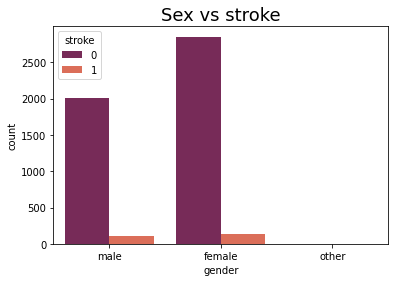

In [15]:
sns.countplot(x=df['gender'],hue=df['stroke'],palette='rocket')
plt.title("Sex vs stroke", fontsize=18)
plt.show()


In [ ]:
## Isvados : insultas yra dažnesnis tarp vyrų nei moterų.Tačiau pagal turimus duomenis šis skirtumas nėra didelis.

In [ ]:
## 2.Vyresnis amžius turi tiesioginės įtakos insultui

In [30]:
ages_count = df.age.value_counts().sort_values(ascending=False)
ages_count.iloc[:10]

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
45.0     85
79.0     85
53.0     85
55.0     83
50.0     83
Name: age, dtype: int64

C:\Users\Tavatevs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Strokes')

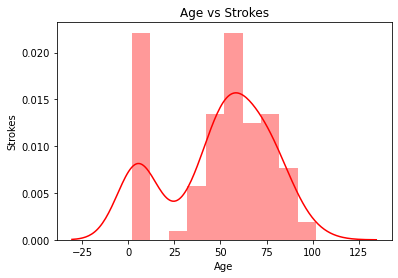

In [31]:
sns.distplot(ages_count, bins = 10, color='r')
plt.title("Age vs Strokes")
plt.xlabel("Age")
plt.ylabel("Strokes")

In [ ]:
## Vyresnio amžiau žmonės dažniau patiria insultą. 

In [ ]:
## 3.Žmonės, turintys hipertenzija, yra labiau linkę į insultą​

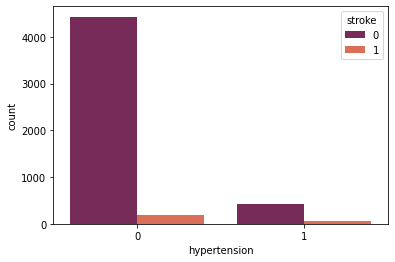

In [32]:
sns.countplot(x=df['hypertension'],hue=df['stroke'],palette='rocket')
plt.show()

In [ ]:
## ISvados : Žmonės, kuriems diagnozuota hipertenzija, turi didesne insulto tikimybę.

In [ ]:
## 4.Vedę žmonės dažniau patiria insultą nei nesusituokę

<AxesSubplot:xlabel='ever_married', ylabel='count'>

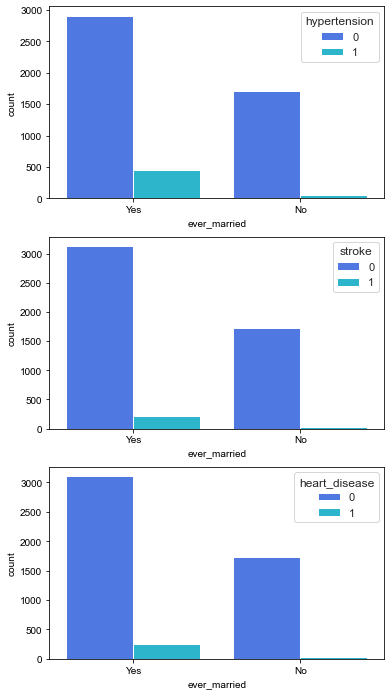

In [33]:
fig, axs = plt.subplots(3, figsize=(6,12))
sns.set_theme(style='whitegrid',palette='rainbow' )
sns.countplot(data = df, x='ever_married', hue='hypertension', ax=axs[0])

sns.countplot(data = df, x='ever_married', hue='stroke', ax=axs[1])

sns.countplot(data = df, x='ever_married', hue='heart_disease', ax=axs[2])

In [34]:
pd.crosstab([df['hypertension'], df['heart_disease'],df['stroke']], 
            df['ever_married'])

ever_married                         No   Yes
hypertension heart_disease stroke            
0            0             0       1666  2585
                           1         15   134
             1             0         20   158
                           1          3    31
1            0             0         37   344
                           1          7    46
             1             0          5    46
                           1          4     9

In [ ]:
## Tie žmonės, kurie kada nors buvo vedę, turi daugiau hipertenzijos, širdies ligų ir insulto atvejų nei tie, kurie nebuvo vedę.

In [ ]:
## 5.Rūkantys žmonės dažniau patiria insultą.​

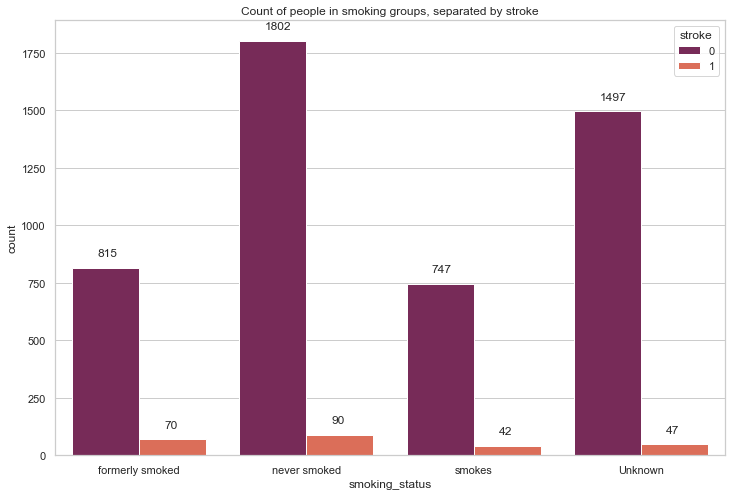

In [35]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='smoking_status',data=df, palette='rocket',hue='stroke')
plt.title("Count of people in smoking groups, separated by stroke")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

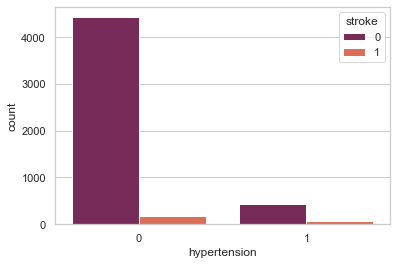

In [36]:
sns.countplot(x=df['hypertension'],hue=df['stroke'],palette='rocket')
plt.show()

In [ ]:
##     Rūkantys ir prieš tai rūkę žmones turi didesnę insulto tikimybe.​ Taip pat rūkaliai labiau nei kiti kenčia nuo hipertenzijos, kuri turi itakos insultui.

In [ ]:
## 6.Privačiame sektoriuje dirbantys bei mieste gyvenantys žmonės turi didesnę insulto tikimybę​

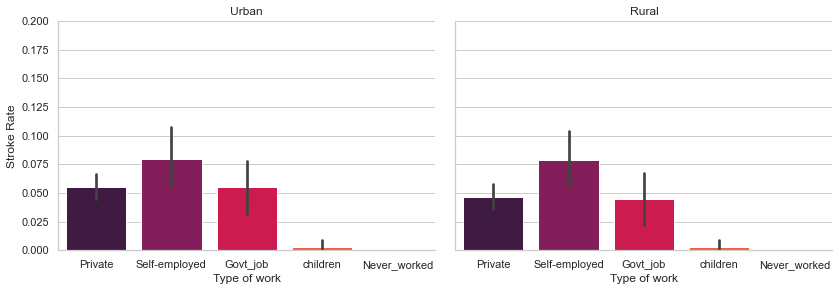

In [37]:
graf = sns.catplot(x='work_type',y='stroke', col = 'Residence_type', data=df, kind='bar', palette='rocket', saturation =2.5)
(graf.set_axis_labels("Type of work", "Stroke Rate").set_titles("{col_name}").set(ylim=(0,0.20)))
graf.fig.set_figwidth(12)
graf.fig.set_figheight(4)

In [ ]:
    ## Gyvenimo sąlygos(rural/urban) insulto tikimybei įtakos nedaro.​Žmonės, dirbantys pagal individualią veiklą patiria daugiau insulto atvejų.